<h5 Style= 'color:#69d0b3'> Brandon Retana Diaz</h5>
<h5 Style= 'color:#69d0b3'> Grupo #1 Analisis de Datos</h5>
<h5 Style= 'color:#69d0b3'> Universidad Castro Carazo</h5>





<h1  Style='text-align:center; color:#2790b0'> Proyecto De Analisis De Datos</h1>
<br></br>
<br></br>

<h3 Style= 'text-align:center; color:#233f65'> CreditOne</h3>
<br></br>
<br></br>


<h3 Style='color: #1693a7'>1.  Carga de Librerias</h3>

In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<h3 Style='color: #1693a7'>2. Importacion del set de datos</h3>

In [2]:
credit= pd.read_excel("credit.xlsx")
credit.drop(['Unnamed: 0'], axis=1, inplace=True)
credit.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_ATM5,BILL_ATM6,PAY_ATM1,PAY_ATM2,PAY_ATM3,PAY_ATM4,PAY_ATM5,PAY_AMT6,default payment next month (Y),BILL_ATM16
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,default,0
1,120000,female,university,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,3455
2,90000,female,university,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,14948


In [3]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_ATM2',
       'BILL_ATM3', 'BILL_ATM4', 'BILL_ATM5', 'BILL_ATM6', 'PAY_ATM1',
       'PAY_ATM2', 'PAY_ATM3', 'PAY_ATM4', 'PAY_ATM5', 'PAY_AMT6',
       'default payment next month (Y)', 'BILL_ATM16'],
      dtype='object')

In [4]:
credit= credit.rename(columns={'default payment next month (Y)':'Y'})

<h3 Style='color: #1693a7'>3. Reduccion de caracteristicas</h3>

In [5]:
features=['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5','PAY_6', 'BILL_ATM4','BILL_ATM5', 'BILL_ATM6', 
           'PAY_ATM1','PAY_ATM2', 'PAY_ATM3', 'PAY_ATM4', 'PAY_ATM5', 'PAY_AMT6']
x = credit.loc[:, features].values

y= credit.loc[:, ['Y']].values

x=StandardScaler().fit_transform(x)
print(x)

[[-1.12642689 -1.20840397  1.77647823 ... -0.34328006 -0.29509662
  -0.25656677]
 [-0.35402725 -0.99677208 -0.89437003 ... -0.27310016 -0.29509662
  -0.15692781]
 [-0.58574714 -0.15024451 -0.00408727 ... -0.27310016 -0.23589944
  -0.00746937]
 ...
 [-0.27678728 -1.20840397  0.88619548 ... -0.27302998 -0.23951047
  -0.20609964]
 [-0.43126721 -0.89095613 -0.00408727 ... -0.22411459 -0.18197081
  -0.16649315]
 [ 0.26389247 -0.67932424 -0.00408727 ... -0.20965753 -0.29438625
   0.0036902 ]]


In [6]:
pca= PCA(n_components=2)

principalComponents= pca.fit_transform(x)

principalDf=pd.DataFrame(data= principalComponents
                        ,columns=['principal_component_1','principal_component_2'])
principalDf.head(10)


,principal_component_1,principal_component_2
0,-0.990931,-1.543769
1,0.787866,-1.680828
2,-0.000393,-1.069792
3,0.183602,-0.944234
4,-0.367345,0.147908
5,0.066790,-1.104463
6,6.319754,10.691011
7,-1.097317,-1.057845
8,0.505928,-1.393683
9,-3.013827,0.050212


In [7]:
finalDf=pd.concat([principalDf, credit[['Y']]], axis=1)
finalDf.head(10)

,principal_component_1,principal_component_2,Y
0,-0.990931,-1.543769,default
1,0.787866,-1.680828,default
2,-0.000393,-1.069792,not default
3,0.183602,-0.944234,not default
4,-0.367345,0.147908,not default
5,0.066790,-1.104463,not default
6,6.319754,10.691011,not default
7,-1.097317,-1.057845,not default
8,0.505928,-1.393683,not default
9,-3.013827,0.050212,not default


In [22]:
credit = pd.DataFrame(credit)
cdf=credit[['LIMIT_BAL','PAY_ATM1','PAY_ATM2','PAY_ATM3','BILL_ATM4','BILL_ATM5']]
cdf.head(9)

,LIMIT_BAL,PAY_ATM1,PAY_ATM2,PAY_ATM3,BILL_ATM4,BILL_ATM5
0,20000,0,689,0,0,0
1,120000,0,1000,1000,3272,3455
2,90000,1518,1500,1000,14331,14948
3,50000,2000,2019,1200,28314,28959
4,50000,2000,36681,10000,20940,19146
5,50000,2500,1815,657,19394,19619
6,500000,55000,40000,38000,542653,483003
7,100000,380,601,0,221,-159
8,140000,3329,0,432,12211,11793


<function matplotlib.pyplot.show(close=None, block=None)>

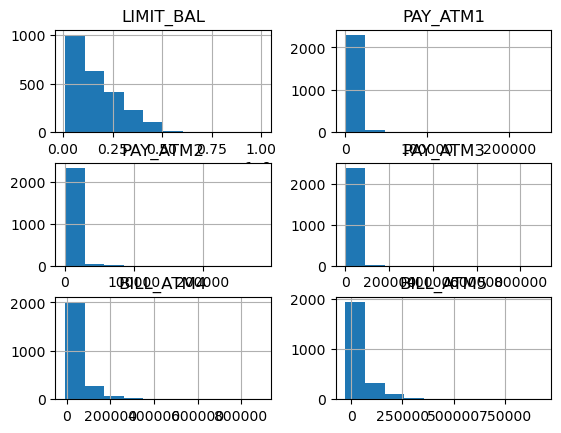

In [23]:
viz = cdf[['LIMIT_BAL','PAY_ATM1','PAY_ATM2','PAY_ATM3','BILL_ATM4','BILL_ATM5']]
viz.hist()
plt.show

In [24]:
msk= np.random.rand(len(credit))<0.8
train= cdf[msk]
test= cdf[~msk]

<h4 Style='color: #1693a7'> Generalizacion del modelo de regresion lineal</h4>

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x =np.asanyarray(train[['PAY_ATM1','PAY_ATM2','PAY_ATM3','BILL_ATM4','BILL_ATM5']])
y= np.asanyarray(train[['LIMIT_BAL']])
regr.fit (x, y)
print('Coeficients: ', regr.coef_)

Coeficients:  [[1.28067558 1.41903595 0.4667622  0.17736111 0.34880595]]


In [26]:
y_hat=regr.predict(test[['PAY_ATM1','PAY_ATM2','PAY_ATM3','BILL_ATM4','BILL_ATM5']])
x =np.asanyarray(test[['PAY_ATM1','PAY_ATM2','PAY_ATM3','BILL_ATM4','BILL_ATM5']])
y= np.asanyarray(test[['LIMIT_BAL']])
print("Residual sum of squares: %.2f"
     %np.mean((y_hat - y) ** 2))
print('Variance score: %.2f'% regr.score(x, y))


Residual sum of squares: 13602027879.78
Variance score: 0.20


D:\Analisis de Datos\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [27]:
df= pd.DataFrame({'Actual': y.flatten(),'Predicted': y_hat.flatten()})
df.head(10)

,Actual,Predicted
0,20000,128767.681678
1,500000,537445.384870
2,20000,132326.884952
3,130000,142052.897611
4,120000,128863.520115
5,60000,129243.190631
6,100000,179995.807923
7,160000,128021.782913
8,280000,243328.510665
9,70000,173776.056300


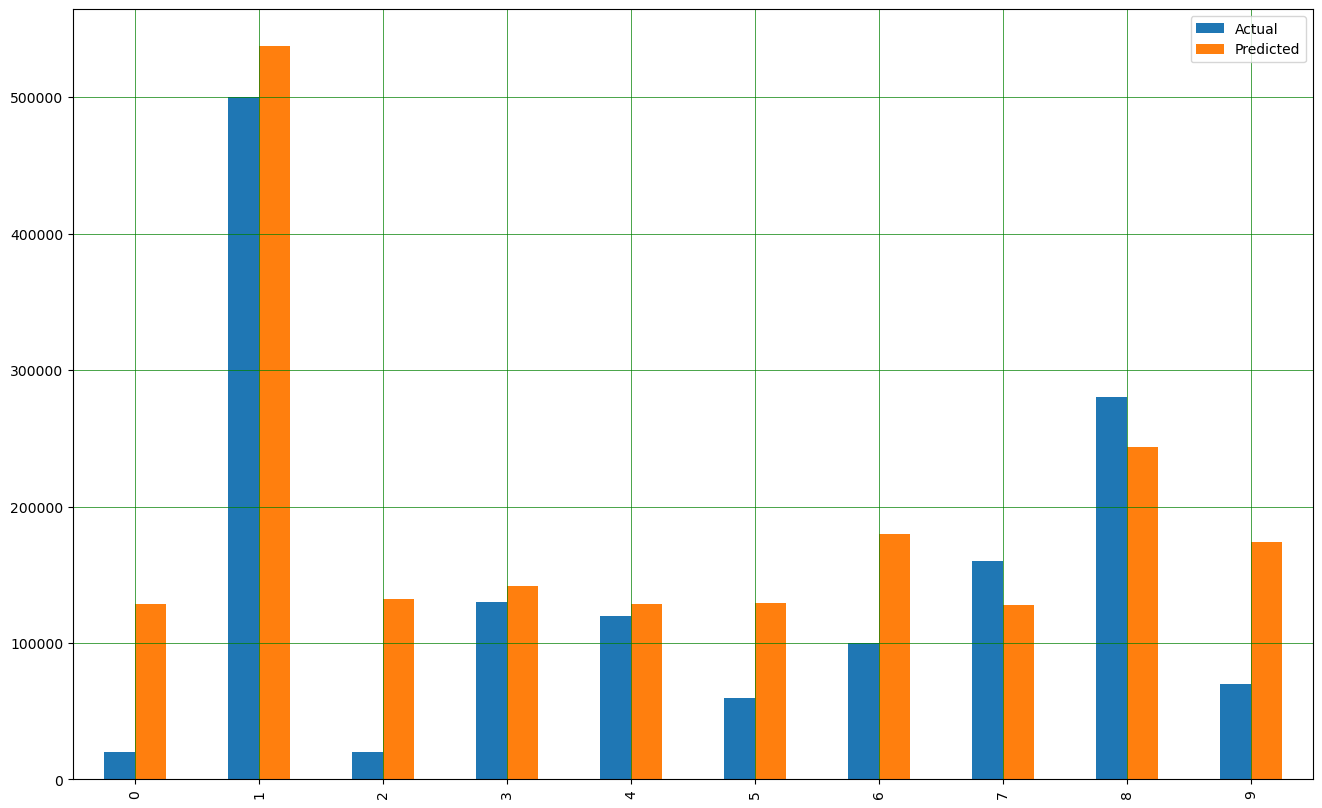

In [28]:
df1=df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

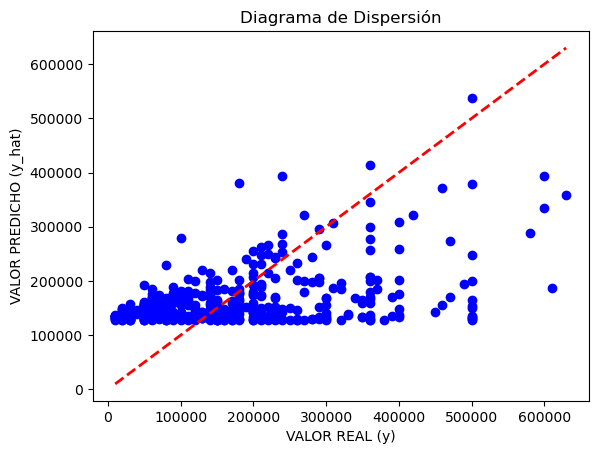

Residual sum of squares: 13602027879.78
Variance score: 0.20


In [29]:

# Crear el diagrama de dispersión
plt.scatter(y, y_hat, color='blue')
plt.title('Diagrama de Dispersión')
plt.xlabel('VALOR REAL (y)')
plt.ylabel('VALOR PREDICHO (y_hat)')

# Añadir una línea de referencia para la igualdad (y = y_hat)
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', linewidth=2)

plt.show()

# Calcular las métricas de evaluación
residuals = y_hat - y
mse = np.mean(residuals ** 2)
variance_score = regr.score(x, y)

print(f"Residual sum of squares: {mse:.2f}")
print(f'Variance score: {variance_score:.2f}')

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x =np.asanyarray(train[['PAY_ATM1']])
y= np.asanyarray(train[['LIMIT_BAL']])
regr.fit (x, y)
print('Coeficients: ', regr.coef_)
print( 'Intercept:', regr.intercept_)

Coeficients:  [[2.49717439]]
Intercept: [154238.68272181]


In [18]:
y_hat=regr.predict(test[['PAY_ATM1']])
x =np.asanyarray(test[['PAY_ATM1']])
y= np.asanyarray(test[['LIMIT_BAL']])
print("Residual sum of squares: %.2f"
     %np.mean((y_hat - y) ** 2))
print('Variance score: %.2f'% regr.score(x, y))

Residual sum of squares: 14354873266.68
Variance score: 0.05


D:\Analisis de Datos\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [19]:
df= pd.DataFrame({'Actual': y.flatten(),'Predicted': y_hat.flatten()})
df.head(10)

,Actual,Predicted
0,20000,154238.682722
1,120000,154238.682722
2,90000,158029.393449
3,50000,160481.618701
4,20000,154238.682722
5,250000,161730.205897
6,320000,180104.415072
7,360000,154238.682722
8,70000,159250.511726
9,50000,158528.828327


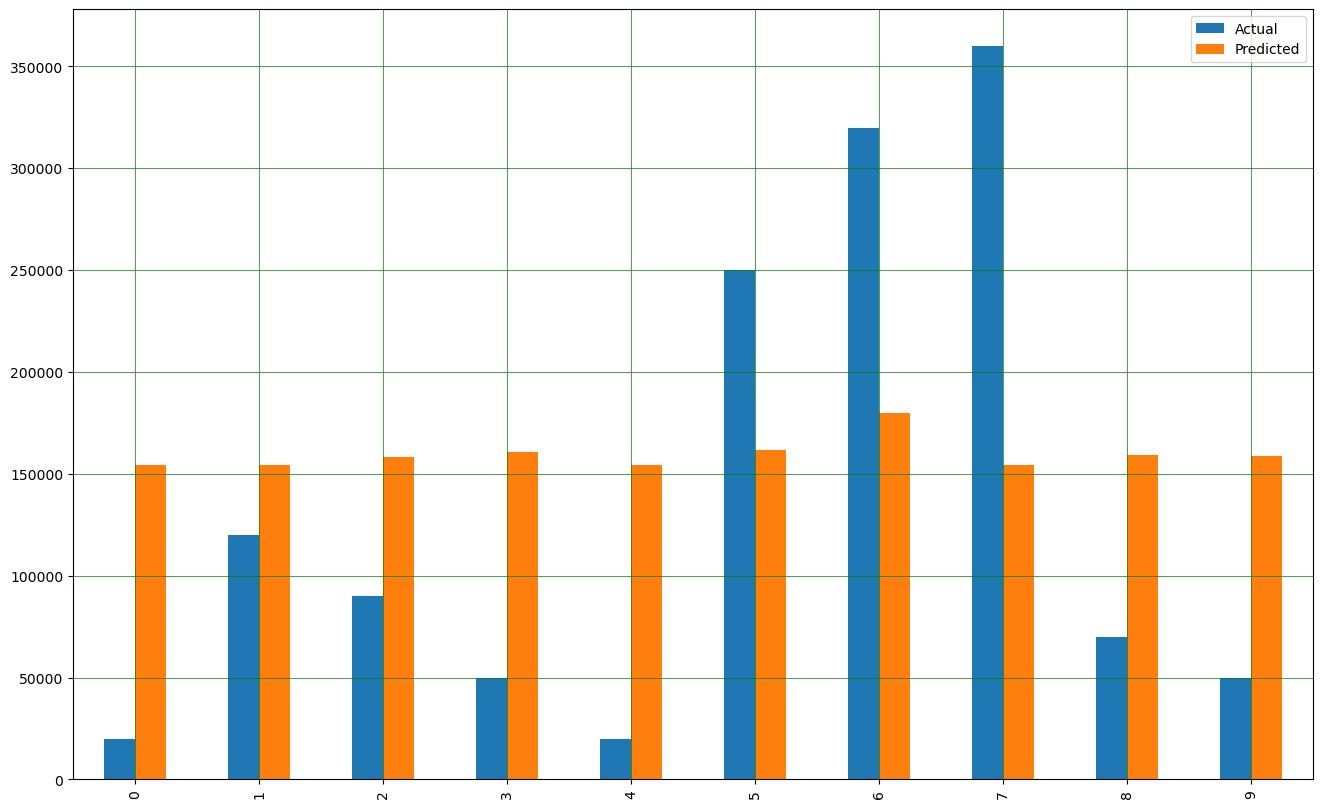

In [20]:
df1=df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

D:\Analisis de Datos\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


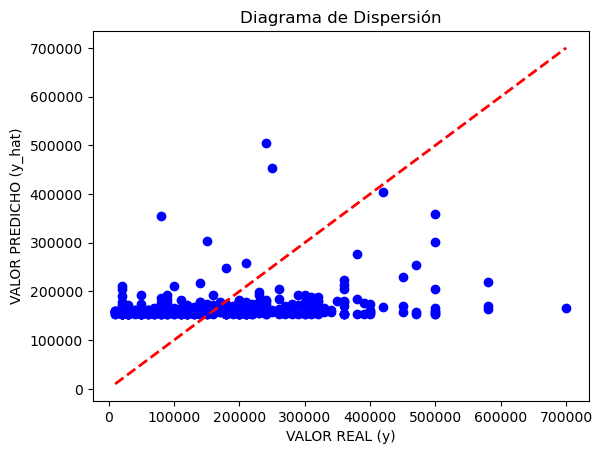

Residual sum of squares: 14354873266.68
Variance score: 0.05


In [21]:
y_hat = regr.predict(test[['PAY_ATM1']])
x = np.asanyarray(test[['PAY_ATM1']])
y = np.asanyarray(test[['LIMIT_BAL']])

# Crear el diagrama de dispersión
plt.scatter(y, y_hat, color='blue')
plt.title('Diagrama de Dispersión')
plt.xlabel('VALOR REAL (y)')
plt.ylabel('VALOR PREDICHO (y_hat)')

# Añadir una línea de referencia para la igualdad (y = y_hat)
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', linewidth=2)

plt.show()

# Calcular las métricas de evaluación
residuals = y_hat - y
mse = np.mean(residuals ** 2)
variance_score = regr.score(x, y)

print(f"Residual sum of squares: {mse:.2f}")
print(f'Variance score: {variance_score:.2f}')